# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

Amirardalan Dehghanpour 401105901

In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [50]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features.
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """
    np.random.seed(42)
    params={
        "W1": np.random.randn(hidden_size, input_size) * 0.1,
        "b1": np.zeros((hidden_size, 1)),
        "W2": np.random.randn(output_size, hidden_size) * 0.1,
        "b2": np.zeros((output_size, 1))
    }
    return params



TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [51]:
def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    return np.maximum(0,x)
def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    return (x > 0).astype(float)

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    return 1/(1+ np.exp(-x))
def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    sig=sigmoid(x)
    return sig * (1-sig)

TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [57]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.
    """
    W1, b1 = parameters["W1"], parameters["b1"]
    W2, b2 = parameters["W2"], parameters["b2"]
    Z1 = np.dot(W1, X.T) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2,
        "X": X
    }

    return A2.T, cache

TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [53]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.
    """
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    return loss


TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [54]:
def backward_propagation(X, y_true, parameters, cache):
    """
    Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.
    """
    gradients = {}
    A1, A2, Z1, Z2 = cache["A1"], cache["A2"], cache["Z1"], cache["Z2"]
    m = y_true.shape[0]
    W2 = parameters["W2"]
    dA2 = A2 - y_true.T
    dZ2 = dA2
    dW2 = np.dot(dZ2, A1.T) /m
    db2 = np.sum(dZ2, axis=1, keepdims=True) /m
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(dZ1, X)
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    gradients = {
        "W1": dW1,
        "b1": db1,
        "W2": dW2,
        "b2": db2
    }

    return gradients


TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [55]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for key in parameters.keys():
      parameters[key] -= learning_rate * gradients[key]
    return parameters

TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

In [56]:
# Training Loop
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    parameters=initialize_parameters(X_train.shape[1],hidden_size,y_train.shape[1])
    loss_history = []
    for epoch in range(0,epochs):
      A2,cache = forward_propagation(X_train,parameters)
      loss = compute_loss(y_train, A2)
      loss_history.append(loss)
      gradients = backward_propagation(X_train, y_train, parameters, cache)
      parameters=update_parameters(parameters,gradients,learning_rate)
      if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")
hid=[32,64,128]
X=x_train.reshape(x_train.shape[0], -1)
for hidden_size in hid:
  print(f"Training with hidden layer size: {hidden_size}")
  train_model(X,y_train,hidden_size,50,0.01)


Training with hidden layer size: 32


<ipython-input-51-42886578c5f9>:34: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(-x))


Epoch 10/50, Loss: 0.7092
Epoch 20/50, Loss: 0.7291
Epoch 30/50, Loss: 0.7488
Epoch 40/50, Loss: 0.7684
Epoch 50/50, Loss: 0.7879
Training with hidden layer size: 64
Epoch 10/50, Loss: 0.7106
Epoch 20/50, Loss: 0.7307
Epoch 30/50, Loss: 0.7505
Epoch 40/50, Loss: 0.7701
Epoch 50/50, Loss: 0.7896
Training with hidden layer size: 128
Epoch 10/50, Loss: 0.7094
Epoch 20/50, Loss: 0.7293
Epoch 30/50, Loss: 0.7479
Epoch 40/50, Loss: 0.7686
Epoch 50/50, Loss: 0.7880


TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [48]:
def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    v = {}
    s = {}
    t = 0
    for key in parameters:
        if key.startswith("W"):  # Initialize moment vectors for weights
            v[key] = np.zeros_like(parameters[key])  # Shape of the weights
            s[key] = np.zeros_like(parameters[key])  # Shape of the weights
        elif key.startswith("b"):  # Initialize moment vectors for biases
            v[key] = np.zeros_like(parameters[key])  # Shape of the biases
            s[key] = np.zeros_like(parameters[key])  # Shape of the biases

    return v, s, t


def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """
    v_corrected = {}
    s_corrected = {}
    t += 1
    for key in parameters:
        v[key] = beta1 * v[key] + (1 - beta1) * gradients[key]
        s[key] = beta2 * s[key] + (1 - beta2) * (gradients[key] ** 2)

        v_corrected[key] = v[key] / (1 - beta1 ** t)
        s_corrected[key] = s[key] / (1 - beta2 ** t)

        parameters[key] -= learning_rate * v_corrected[key] / (np.sqrt(s_corrected[key]) + epsilon)

    return parameters, v, s, t


TODO: Implement Adam optimizer into the training loop.

In [59]:
def train_model_with_adam(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001):
    """
    Train the neural network model using Adam optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    parameters=initialize_parameters(X_train.shape[1],hidden_size,y_train.shape[1])
    loss_history = []
    v,s,t=initialize_adam(parameters)
    for epoch in range(0,epochs):
      A2,cache = forward_propagation(X_train,parameters)
      loss = compute_loss(y_train, A2)
      loss_history.append(loss)
      gradients = backward_propagation(X_train, y_train, parameters, cache)
      parameters,v,s,t=update_parameters_with_adam(parameters,gradients,v,s,t,learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8)
      if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")
hid=[32,64,128]
X=x_train.reshape(x_train.shape[0], -1)
for hidden_size in hid:
  print(f"Training adam with hidden layer size: {hidden_size}")
  train_model_with_adam(X,y_train,hidden_size,50,0.01)

Training adam with hidden layer size: 32
Epoch 10/50, Loss: 1.2157
Epoch 20/50, Loss: 2.0172
Epoch 30/50, Loss: 1.9438
Epoch 40/50, Loss: 1.5242
Epoch 50/50, Loss: 1.3879
Training adam with hidden layer size: 64
Epoch 10/50, Loss: 1.6724
Epoch 20/50, Loss: 1.8827
Epoch 30/50, Loss: 1.2529
Epoch 40/50, Loss: 1.0243
Epoch 50/50, Loss: 0.9257
Training adam with hidden layer size: 128
Epoch 10/50, Loss: 2.1329
Epoch 20/50, Loss: 1.2393
Epoch 30/50, Loss: 0.9263
Epoch 40/50, Loss: 0.8782
Epoch 50/50, Loss: 0.7939


### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [60]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Second moment vector (initialized to zeros).
    """
    s = {}
    for key in parameters:
        if key.startswith("W"):
            s[key] = np.zeros_like(parameters[key])
        elif key.startswith("b"):
            s[key] = np.zeros_like(parameters[key])

    return s

def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """
    for key in parameters:
        s[key] = beta * s[key] + (1 - beta) * (gradients[key] ** 2)
        parameters[key] -= learning_rate * gradients[key] / (np.sqrt(s[key]) + epsilon)

    return parameters, s


TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [61]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    parameters=initialize_parameters(X_train.shape[1],hidden_size,y_train.shape[1])
    loss_history = []
    if(optimizer=='adam'):
      v,s,t=initialize_adam(parameters)
      for epoch in range(0,epochs):
        A2,cache = forward_propagation(X_train,parameters)
        loss = compute_loss(y_train, A2)
        loss_history.append((epoch,loss))
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters,v,s,t=update_parameters_with_adam(parameters,gradients,v,s,t,learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8)
        if (epoch + 1) % 10 == 0:
          print(f"adam  Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")
    elif(optimizer=='rmsprop'):
      s=initialize_rmsprop(parameters)
      for epoch in range(0,epochs):
        A2,cache = forward_propagation(X_train,parameters)
        loss = compute_loss(y_train, A2)
        loss_history.append((epoch,loss))
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters,s=update_parameters_with_rmsprop(parameters,gradients,s,learning_rate=0.001, beta=0.9, epsilon=1e-8)
        if (epoch + 1) % 10 == 0:
          print(f"rmsprop Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")
    return loss_history



TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.

adam  Epoch 10/50, Loss: 2.1329
adam  Epoch 20/50, Loss: 1.2393
adam  Epoch 30/50, Loss: 0.9263
adam  Epoch 40/50, Loss: 0.8782
adam  Epoch 50/50, Loss: 0.7939
rmsprop Epoch 10/50, Loss: 1.1947
rmsprop Epoch 20/50, Loss: 0.9341
rmsprop Epoch 30/50, Loss: 0.7681
rmsprop Epoch 40/50, Loss: 0.6635
rmsprop Epoch 50/50, Loss: 0.7462


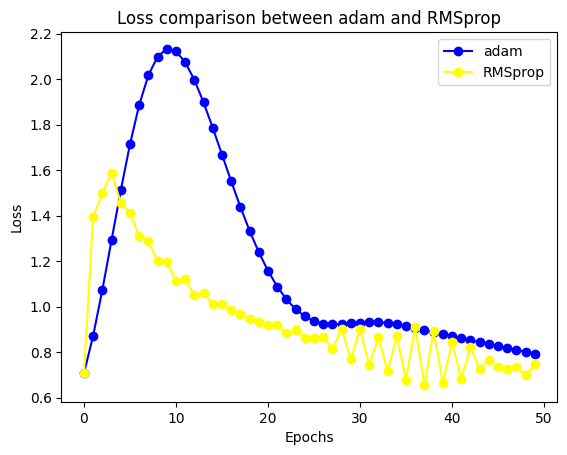

In [62]:
def compare_optimizers(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the Adam and RMSprop optimizers.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    loss_history_adam=train_model(X_train,y_train,hidden_size, epochs=50, learning_rate=0.001, optimizer='adam')
    loss_history_rmsprop=train_model(X_train,y_train,hidden_size, epochs=50, learning_rate=0.001, optimizer='rmsprop')
    epoch_1, loss_1 = zip(*loss_history_adam)
    epoch_2, loss_2 = zip(*loss_history_rmsprop)
    plt.plot(epoch_1, loss_1, label="adam", color='blue', marker='o')
    plt.plot(epoch_2, loss_2, label="RMSprop", color='yellow', marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss comparison between adam and RMSprop")
    plt.legend()
    plt.show()
hidden_size=128
X=x_train.reshape(x_train.shape[0], -1)
compare_optimizers(X,y_train,hidden_size,50)

## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [64]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using Stochastic Gradient Descent (SGD).

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for key in parameters:
      parameters[key] -= learning_rate * gradients[key]
    return parameters

2. Modify the Training Loop


In [65]:
def train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using SGD optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    """
    parameters=initialize_parameters(X_train.shape[1],hidden_size,y_train.shape[1])
    loss_history = []
    for epoch in range(0,epochs):
      A2,cache = forward_propagation(X_train,parameters)
      loss = compute_loss(y_train, A2)
      loss_history.append((epoch,loss))
      gradients = backward_propagation(X_train, y_train, parameters, cache)
      parameters=update_parameters_with_sgd(parameters,gradients,learning_rate)
      if (epoch + 1) % 10 == 0:
        print(f"Epoch with learning rate:{learning_rate} {epoch + 1}/{epochs}, Loss: {loss:.4f}")
    return loss_history

3. Experiment with Different Learning Rates


<ipython-input-51-42886578c5f9>:34: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(-x))


Epoch with learning rate:0.001 10/50, Loss: 0.6698
Epoch with learning rate:0.001 20/50, Loss: 0.6559
Epoch with learning rate:0.001 30/50, Loss: 0.6798
Epoch with learning rate:0.001 40/50, Loss: 0.6913
Epoch with learning rate:0.001 50/50, Loss: 9.3898
Epoch with learning rate:0.01 10/50, Loss: 0.7094
Epoch with learning rate:0.01 20/50, Loss: 0.7293
Epoch with learning rate:0.01 30/50, Loss: 0.7479
Epoch with learning rate:0.01 40/50, Loss: 0.7686
Epoch with learning rate:0.01 50/50, Loss: 0.7880
Epoch with learning rate:0.1 10/50, Loss: 0.8736
Epoch with learning rate:0.1 20/50, Loss: 1.0478
Epoch with learning rate:0.1 30/50, Loss: 1.2005
Epoch with learning rate:0.1 40/50, Loss: 1.3316
Epoch with learning rate:0.1 50/50, Loss: 1.4441


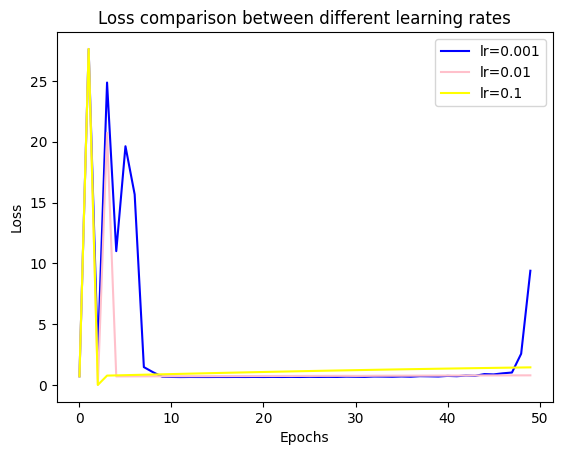

In [66]:
def compare_learning_rates(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.
    """
    loss_lr1 = []
    loss_lr2 = []
    loss_lr3 = []
    loss_lr1 = train_model_with_sgd(X_train,y_train,hidden_size,epochs,learning_rates[0])
    loss_lr2 = train_model_with_sgd(X_train,y_train,hidden_size,epochs,learning_rates[1])
    loss_lr3 = train_model_with_sgd(X_train,y_train,hidden_size,epochs,learning_rates[2])
    epoch_1, losss_1 = zip(*loss_lr1)
    epoch_2, losss_2 = zip(*loss_lr2)
    epoch_3, losss_3 = zip(*loss_lr3)
    plt.plot(epoch_1, losss_1, label="lr=0.001", color='blue')
    plt.plot(epoch_2, losss_2, label="lr=0.01", color='pink')
    plt.plot(epoch_3, losss_3, label="lr=0.1", color='yellow')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss comparison between different learning rates")
    plt.legend()
    plt.show()
hidden_size=128
X=x_train.reshape(x_train.shape[0], -1)
compare_learning_rates(X,y_train,hidden_size,50,learning_rates=[0.001, 0.01, 0.1])

### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [67]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variable (initialized to zeros).
    """
    v = {}
    v['W1'] = np.zeros_like(parameters['W1'])
    v['b1'] = np.zeros_like(parameters['b1'])
    v['W2'] = np.zeros_like(parameters['W2'])
    v['b2'] = np.zeros_like(parameters['b2'])

    return v

def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: Momentum variable.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated momentum variable.
    """
    v['W1'] = beta * v['W1'] + (1 - beta) * gradients['W1']
    v['b1'] = beta * v['b1'] + (1 - beta) * gradients['b1']
    v['W2'] = beta * v['W2'] + (1 - beta) * gradients['W2']
    v['b2'] = beta * v['b2'] + (1 - beta) * gradients['b2']
    parameters['W1'] -= learning_rate * v['W1']
    parameters['b1'] -= learning_rate * v['b1']
    parameters['W2'] -= learning_rate * v['W2']
    parameters['b2'] -= learning_rate * v['b2']

    return parameters, v


3. Modify the Training Loop


In [70]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').
    Returns:
    - loss_history: List of loss values over epochs.
    """
    loss_history = []
    if optimizer == 'sgd':
      parameters=initialize_parameters(X_train.shape[1],hidden_size,y_train.shape[1])
      for epoch in range(0,epochs):
       A2,cache = forward_propagation(X_train,parameters)
       loss = compute_loss(y_train, A2)
       loss_history.append((epoch,loss))
       gradients = backward_propagation(X_train, y_train, parameters, cache)
       parameters=update_parameters_with_sgd(parameters,gradients,learning_rate)
       if (epoch + 1) % 10 == 0:
        print(f"Epoch with sgd {epoch + 1}/{epochs}, Loss: {loss:.4f}")
    elif optimizer == 'momentum':
      parameters=initialize_parameters(X_train.shape[1],hidden_size,y_train.shape[1])
      v=initialize_momentum(parameters)
      for epoch in range(0,epochs):
       A2,cache = forward_propagation(X_train,parameters)
       loss = compute_loss(y_train, A2)
       loss_history.append((epoch,loss))
       gradients = backward_propagation(X_train, y_train, parameters, cache)
       parameters,v=update_parameters_with_momentum(parameters,gradients,v,learning_rate,beta=0.9)
       if (epoch + 1) % 10 == 0:
        print(f"Epoch with momentm {epoch + 1}/{epochs}, Loss: {loss:.4f}")
    return loss_history

4. Train the Model with Both Optimizers


<ipython-input-51-42886578c5f9>:34: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(-x))


Epoch with sgd 10/50, Loss: 0.7094
Epoch with sgd 20/50, Loss: 0.7293
Epoch with sgd 30/50, Loss: 0.7479
Epoch with sgd 40/50, Loss: 0.7686
Epoch with sgd 50/50, Loss: 0.7880
Epoch with momentm 10/50, Loss: 5.1981
Epoch with momentm 20/50, Loss: 0.6975
Epoch with momentm 30/50, Loss: 0.9500
Epoch with momentm 40/50, Loss: 0.7594
Epoch with momentm 50/50, Loss: 2.3444


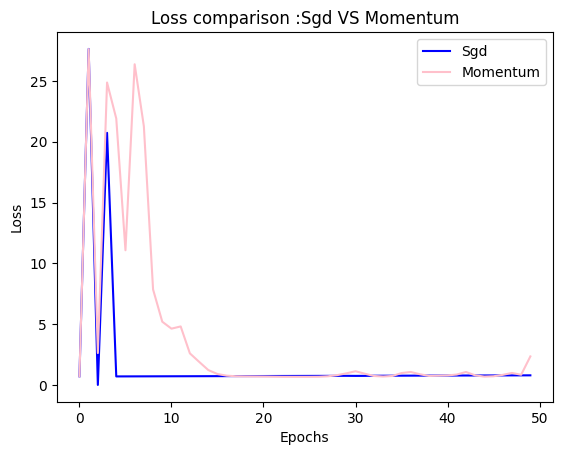

In [71]:
def compare_sgd_and_momentum(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    loss_sgd = []
    loss_mom = []
    loss_sgd = train_model(X_train,y_train,hidden_size,epochs,0.01,'sgd')
    loss_mom = train_model(X_train,y_train,hidden_size,epochs,0.01,'momentum')
    epoch_1, losss_1 = zip(*loss_sgd)
    epoch_2, losss_2 = zip(*loss_mom)
    plt.plot(epoch_1, losss_1, label="Sgd", color='blue')
    plt.plot(epoch_2, losss_2, label="Momentum", color='pink')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss comparison :Sgd VS Momentum")
    plt.legend()
    plt.show()
hidden_size=128
X=x_train.reshape(x_train.shape[0], -1)
compare_sgd_and_momentum(X,y_train,hidden_size,50)

## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [81]:
def compute_accuracy(y_true, y_pred):
    predicted_classes = np.argmax(y_pred, axis=1)
    true_classes = np.argmax(y_true, axis=1)
    correct_predictions = np.sum(predicted_classes == true_classes)
    accuracy = correct_predictions / y_true.shape[0]
    return accuracy
def train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    parameters = initialize_parameters(X_train.shape[1], hidden_size, y_train.shape[1])
    loss_history = []
    accuracy_history = []
    for epoch in range(epochs):
        indices = np.arange(X_train.shape[0])
        np.random.shuffle(indices)
        X_train_shuffled = X_train[indices]
        y_train_shuffled = y_train[indices]
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train_shuffled[i:i + batch_size]
            y_batch = y_train_shuffled[i:i + batch_size]
            A2, cache = forward_propagation(X_batch, parameters)
            loss = compute_loss(y_batch, A2)
            gradients = backward_propagation(X_batch, y_batch, parameters, cache)
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        A2_full, _ = forward_propagation(X_train, parameters)
        loss_epoch = compute_loss(y_train, A2_full)
        accuracy_epoch = compute_accuracy(y_train, A2_full)
        loss_history.append(loss_epoch)
        accuracy_history.append(accuracy_epoch)
        if(epoch %10 ==0):
          acc = accuracy_epoch * 100
          print(f"Epoch {epoch }/{epochs} - Loss: {loss_epoch:.4f}, Accuracy: {acc }")

    return loss_history, accuracy_history


2. Train the Model with Different Mini-Batch Sizes


In [82]:
def compare_mini_batch_sizes(X_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.
    """
    results = {}

    for batch_size in batch_sizes:
        print(f"\nTraining with Mini-Batch Size: {batch_size}")
        loss_history, accuracy_history = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, batch_size=batch_size)
        print(f"final loss: {loss_history[epochs-1]},final accuracy : {accuracy_history[epochs-1]} ")
X = x_train.reshape(x_train.shape[0], -1)
compare_mini_batch_sizes(X, y_train, 128 , epochs=50, batch_sizes=[16, 32, 64])



Training with Mini-Batch Size: 16
Epoch 0/50 - Loss: 0.4388, Accuracy: 85.42999999999999
Epoch 10/50 - Loss: 0.2808, Accuracy: 90.62833333333333
Epoch 20/50 - Loss: 0.2286, Accuracy: 92.31166666666667
Epoch 30/50 - Loss: 0.1828, Accuracy: 93.98833333333333
Epoch 40/50 - Loss: 0.1942, Accuracy: 93.78166666666667
final loss: 0.15634041059967452,final accuracy : 0.9481666666666667 

Training with Mini-Batch Size: 32
Epoch 0/50 - Loss: 0.4396, Accuracy: 85.03666666666668
Epoch 10/50 - Loss: 0.2871, Accuracy: 90.33
Epoch 20/50 - Loss: 0.2381, Accuracy: 92.00166666666667
Epoch 30/50 - Loss: 0.1926, Accuracy: 93.66
Epoch 40/50 - Loss: 0.1888, Accuracy: 93.83
final loss: 0.17172165020953942,final accuracy : 0.9435333333333333 

Training with Mini-Batch Size: 64
Epoch 0/50 - Loss: 0.4710, Accuracy: 83.91666666666666
Epoch 10/50 - Loss: 0.2893, Accuracy: 89.985
Epoch 20/50 - Loss: 0.2596, Accuracy: 91.39166666666667
Epoch 30/50 - Loss: 0.2214, Accuracy: 92.77333333333333
Epoch 40/50 - Loss: 0.2

### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [83]:
def train_model_full_batch(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    parameters = initialize_parameters(X_train.shape[1], hidden_size, y_train.shape[1])
    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        accuracy_epoch = compute_accuracy(y_train, A2)
        loss_history.append(loss)
        accuracy_history.append(accuracy_epoch)
        acc = accuracy_epoch *100
        if(epoch % 10 ==0):
          print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f}, Accuracy: {acc}")

    return loss_history, accuracy_history


In [88]:
import time
def compare_mini_batch_and_full_batch(X_train, y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """
    print("\nTraining with Mini-Batch Gradient Descent")
    time1=time.time()
    mini_batch_loss, mini_batch_accuracy = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, batch_size=batch_size)
    time2=time.time()
    print(f"final loss: {mini_batch_loss[epochs-1]},final accuracy : {mini_batch_accuracy[epochs-1]} time : {time2-time1}")
    print("\nTraining with Full-Batch Gradient Descent")
    time1=time.time()
    full_batch_loss, full_batch_accuracy = train_model_full_batch(X_train, y_train, hidden_size, epochs)
    time2=time.time()
    print(f"final loss: {full_batch_loss[epochs-1]},final accuracy : {full_batch_accuracy[epochs-1]} time : {time2-time1}")

X = x_train.reshape(x_train.shape[0], -1)
compare_mini_batch_and_full_batch(X, y_train, 128 , epochs=50, batch_size=32)


Training with Mini-Batch Gradient Descent
Epoch 0/50 - Loss: 0.4396, Accuracy: 85.03666666666668
Epoch 10/50 - Loss: 0.2871, Accuracy: 90.33
Epoch 20/50 - Loss: 0.2381, Accuracy: 92.00166666666667
Epoch 30/50 - Loss: 0.1926, Accuracy: 93.66
Epoch 40/50 - Loss: 0.1888, Accuracy: 93.83
final loss: 0.17172165020953942,final accuracy : 0.9435333333333333 time : 166.98220109939575

Training with Full-Batch Gradient Descent
Epoch 0/50 - Loss: 0.7071, Accuracy: 14.745


<ipython-input-51-42886578c5f9>:34: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(-x))


Epoch 10/50 - Loss: 0.7114, Accuracy: 10.015
Epoch 20/50 - Loss: 0.7312, Accuracy: 10.021666666666667
Epoch 30/50 - Loss: 0.7420, Accuracy: 12.583333333333332
Epoch 40/50 - Loss: 0.7705, Accuracy: 10.01
final loss: 0.7880234547183363,final accuracy : 0.10008333333333333 time : 60.19332575798035
